In [1]:
#Autor: João Gonçalves

In [2]:
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [3]:
dir = r'C:\<Path>\PetImages'

In [4]:
img_height = 256
img_width = 256
batch_size= 32

train_ds = tf.keras.utils.image_dataset_from_directory(
  dir,
  validation_split=0.05,
  labels = 'inferred',
  label_mode = 'int',
  color_mode='rgb',
  subset="training",
  shuffle = True,
  interpolation='bilinear',
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

# para treino
val_ds = tf.keras.utils.image_dataset_from_directory(
  dir,
  validation_split=0.05,
  labels = 'inferred',
  label_mode = 'int',
  color_mode='rgb',
  subset="validation",
  shuffle = True,
  interpolation='bilinear',
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

tf.keras.layers.Rescaling(
    scale=1./255, offset=0.0
)


Found 3995 files belonging to 2 classes.
Using 3796 files for training.
Found 3995 files belonging to 2 classes.
Using 199 files for validation.


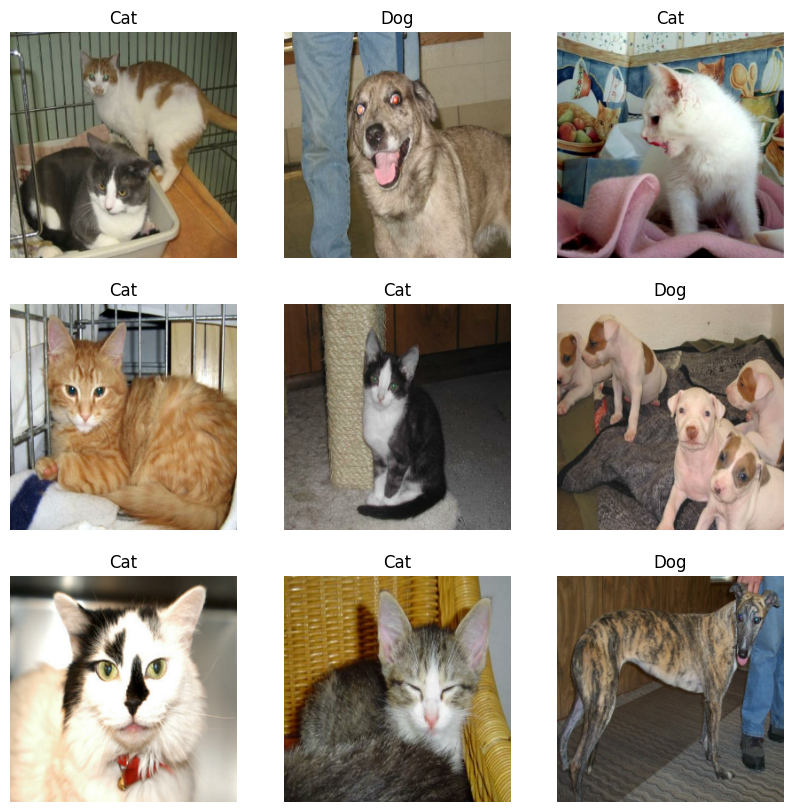

In [5]:
class_names=['Cat','Dog']

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [6]:
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 256, 256, 3)
(32,)


In [7]:
num_classes = 2
# modelo de rede neuronal
model = keras.Sequential([
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu",input_shape = (256,256,3),padding='same'),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.BatchNormalization(),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu",padding='same'),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.BatchNormalization(),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu",padding='same'),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.BatchNormalization(),
        layers.Conv2D(128, kernel_size=(3, 3), activation="relu",padding='same'),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.BatchNormalization(),
        layers.Conv2D(128, kernel_size=(3, 3), activation="relu",padding='same'),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dense(512),
        layers.Dropout(0.2),
        layers.Dense(1, activation="sigmoid"),
    ])

# sumario da rede
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 256, 256, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 128, 128, 32)     0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 128, 128, 32)     128       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 128, 128, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 64, 64, 64)       0         
 2D)                                                             
                                                        

In [8]:
epochs = 25

model.compile(loss='binary_crossentropy', optimizer='SGD', metrics=["accuracy"])

hist = model.fit(train_ds, validation_data=val_ds, epochs=epochs)

Epoch 1/25
119/119 [==============================] - 16s 100ms/step - loss: 1.1998 - accuracy: 0.5925 - val_loss: 0.6444 - val_accuracy: 0.5779
Epoch 2/25
119/119 [==============================] - 11s 91ms/step - loss: 0.5925 - accuracy: 0.6836 - val_loss: 0.5190 - val_accuracy: 0.7286
Epoch 3/25
119/119 [==============================] - 11s 89ms/step - loss: 0.4936 - accuracy: 0.7508 - val_loss: 0.4829 - val_accuracy: 0.7487
Epoch 4/25
119/119 [==============================] - 11s 88ms/step - loss: 0.4467 - accuracy: 0.7895 - val_loss: 0.4904 - val_accuracy: 0.7588
Epoch 5/25
119/119 [==============================] - 11s 89ms/step - loss: 0.4095 - accuracy: 0.8138 - val_loss: 0.4668 - val_accuracy: 0.7789
Epoch 6/25
119/119 [==============================] - 11s 89ms/step - loss: 0.3882 - accuracy: 0.8214 - val_loss: 0.4721 - val_accuracy: 0.8040
Epoch 7/25
119/119 [==============================] - 11s 90ms/step - loss: 0.3317 - accuracy: 0.8538 - val_loss: 0.4702 - val_accuracy

1/1 [==============================] - 0s 250ms/step
The model predicts: Cat.


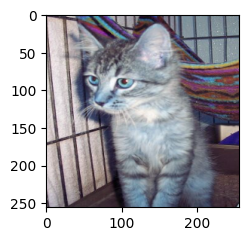

In [9]:
image_path = dir + "/Cat/2.jpg"
image_color = cv2.resize(cv2.imread(image_path, cv2.IMREAD_COLOR), (256,256), interpolation=cv2.INTER_CUBIC)
image = tf.expand_dims(np.array(image_color).astype("float32") / 255, 0)   
pred = model.predict(image)
pred = np.argmax(pred)
classe = ['Cat', 'Dog']
plt.figure(figsize=(5,2.5))
plt.imshow(image_color)
print("The model predicts: " + classe[pred] + ".")